In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
url = 'NVidia_stock_history.csv'
nvidia = pd.read_csv(url)
len(nvidia.index)

5743

In [3]:
#Deleting null records
nvidia = nvidia.dropna(how='any',axis=0)
len(nvidia.index)

5742

In [4]:
nvidia = nvidia.sort_values('Date')
nvidia.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22,0.401941,0.448595,0.356484,0.376820,271468800.0,0.0,0.0
1,1999-01-25,0.406726,0.421081,0.376820,0.416296,51048000.0,0.0,0.0
2,1999-01-26,0.421081,0.429455,0.378016,0.383998,34320000.0,0.0,0.0
3,1999-01-27,0.385194,0.394764,0.363661,0.382801,24436800.0,0.0,0.0
4,1999-01-28,0.382801,0.385194,0.379212,0.381605,22752000.0,0.0,0.0


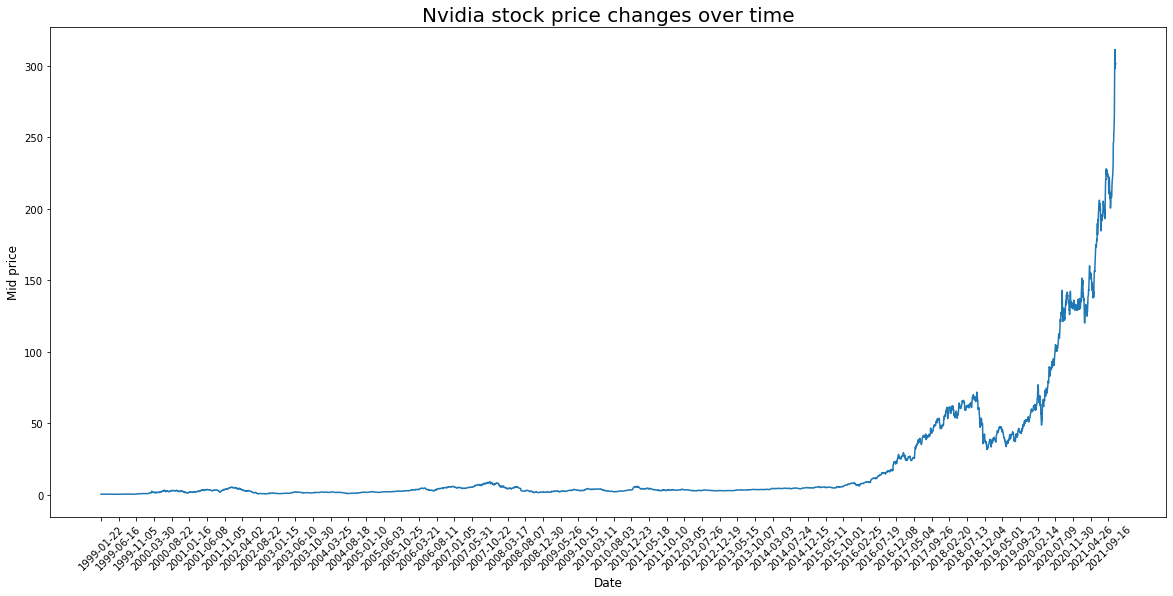

In [5]:
#Seeing how the price changes over time
plt.figure(figsize = (20,9))
plt.plot(nvidia.Date, (nvidia.High+nvidia.Low)/2)
plt.xticks(range(0,nvidia.shape[0],100),nvidia['Date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Mid price',fontsize=12)
plt.title('Nvidia stock price changes over time',fontsize=20)
plt.show()

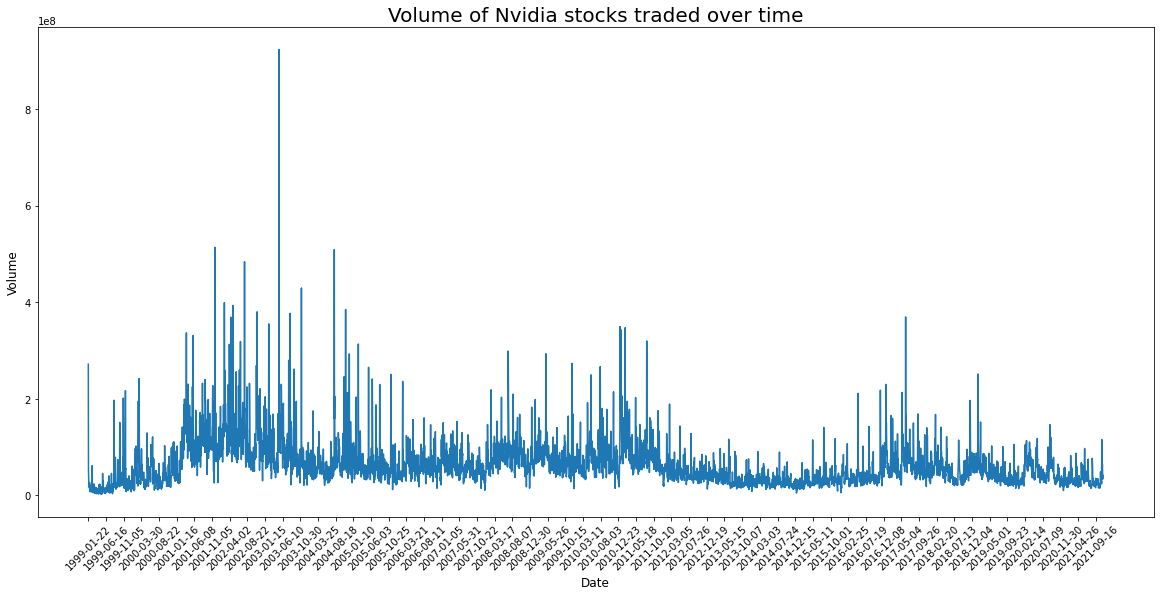

In [6]:
#Volume of stocks traded over time
plt.figure(figsize = (20,9))
plt.plot(nvidia.Date, nvidia.Volume)
plt.xticks(range(0,nvidia.shape[0],100),nvidia['Date'].loc[::100],rotation=45)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Volume',fontsize=12)
plt.title('Volume of Nvidia stocks traded over time',fontsize=20)
plt.show()

In [7]:
nvidia['midprice'] = (nvidia.High + nvidia.Low)/2
nvidia.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,midprice
0,1999-01-22,0.401941,0.448595,0.356484,0.376820,271468800.0,0.0,0.0,0.402539
1,1999-01-25,0.406726,0.421081,0.376820,0.416296,51048000.0,0.0,0.0,0.398950
2,1999-01-26,0.421081,0.429455,0.378016,0.383998,34320000.0,0.0,0.0,0.403736
3,1999-01-27,0.385194,0.394764,0.363661,0.382801,24436800.0,0.0,0.0,0.379212
4,1999-01-28,0.382801,0.385194,0.379212,0.381605,22752000.0,0.0,0.0,0.382203


In [8]:
#The daily return 
nvidia['Daily_returns'] = nvidia.midprice.pct_change()
nvidia.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,midprice,Daily_returns
0,1999-01-22,0.401941,0.448595,0.356484,0.376820,271468800.0,0.0,0.0,0.402539,NaN
1,1999-01-25,0.406726,0.421081,0.376820,0.416296,51048000.0,0.0,0.0,0.398950,-0.008916
2,1999-01-26,0.421081,0.429455,0.378016,0.383998,34320000.0,0.0,0.0,0.403736,0.011995
3,1999-01-27,0.385194,0.394764,0.363661,0.382801,24436800.0,0.0,0.0,0.379212,-0.060741
4,1999-01-28,0.382801,0.385194,0.379212,0.381605,22752000.0,0.0,0.0,0.382203,0.007886


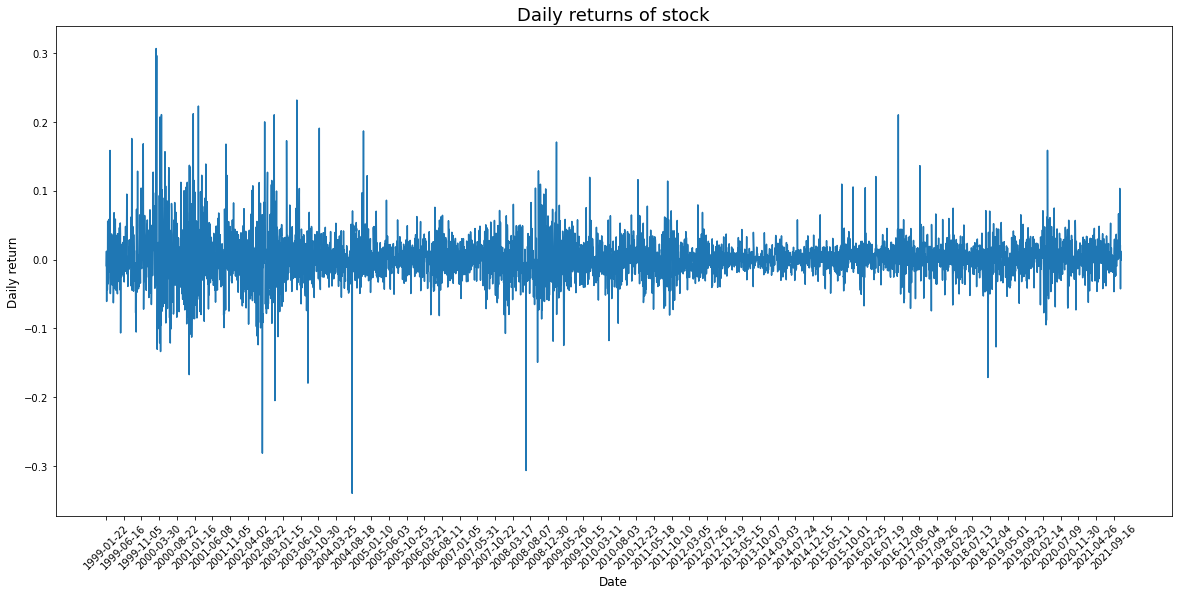

In [9]:
plt.figure(figsize=(20,9))
plt.plot(nvidia.Date, nvidia.Daily_returns)
plt.xticks(range(0,nvidia.shape[0],100),nvidia.Date.loc[::100],rotation=45)
plt.title('Daily returns of stock',fontsize=18)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Daily return',fontsize=12)
plt.show()

In [10]:
#The monthly return
#.resample()

In [11]:
#The yearly return 

In [12]:
#Short-term moving average of 20 days
short_MA = nvidia.rolling(window=20).mean()
short_MA.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,midprice,Daily_returns
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Long-term moving average of 80 days
long_MA = nvidia.rolling(window=80).mean()
long_MA.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,midprice,Daily_returns
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


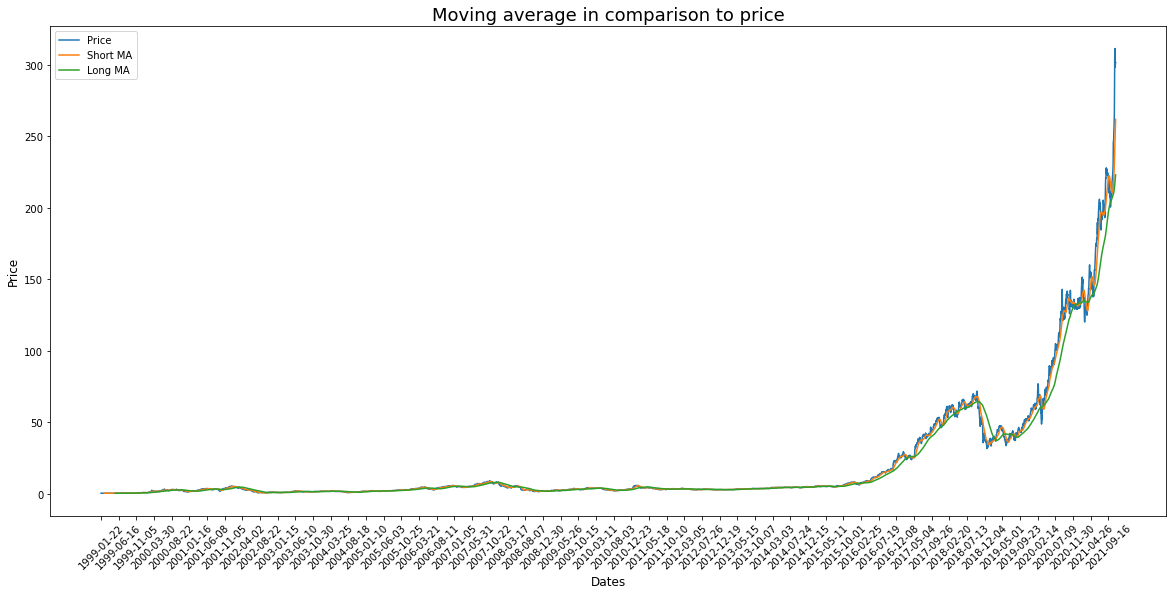

In [14]:
#Plotting the price, long MA and short MA for comparison
plt.figure(figsize=(20,9))

plt.xlabel('Dates',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('Moving average in comparison to price',fontsize=18)

plt.plot(nvidia.Date,nvidia.midprice,label='Price')
plt.plot(nvidia.Date,short_MA.midprice, label='Short MA')
plt.plot(nvidia.Date,long_MA.midprice,label='Long MA')

plt.xticks(range(0,nvidia.shape[0],100),nvidia.Date.loc[::100],rotation=45)

plt.legend()
plt.show()

In [21]:
#Re-plotting the data because the price changes after 2015-05-11 is more interesting so we focus on that
nvidia['Date'] = pd.to_datetime(nvidia['Date'])

In [25]:
mask = (nvidia.Date > '05/11/2015') & (nvidia.Date <= '16/09/2021')
nvidia[mask].head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,midprice,Daily_returns
4227,2015-11-06,7.414684,7.777504,7.261276,7.682537,117227200.0,0.00000,0.0,7.519390,0.105226
4228,2015-11-09,7.607053,7.670364,7.541307,7.648448,49256800.0,0.00000,0.0,7.605835,0.011496
4229,2015-11-10,7.548611,7.590007,7.341633,7.502345,55226000.0,0.00000,0.0,7.465820,-0.018409
4230,2015-11-11,7.507216,7.560786,7.402509,7.429295,61989600.0,0.00000,0.0,7.481648,0.002120
4231,2015-11-12,7.412249,7.480430,7.370853,7.402509,29108000.0,0.00000,0.0,7.425642,-0.007486
4232,2015-11-13,7.409814,7.441470,7.219881,7.256407,29294000.0,0.00000,0.0,7.330675,-0.012789
4233,2015-11-16,7.351373,7.407379,7.292932,7.402509,34428000.0,0.00000,0.0,7.350156,0.002657
4234,2015-11-17,7.421989,7.465820,7.370853,7.402509,25704800.0,0.00000,0.0,7.418337,0.009276
4235,2015-11-18,7.433061,7.594384,7.352400,7.584607,35021600.0,0.02875,0.0,7.473392,0.007422
4236,2015-11-19,7.611495,7.682379,7.550388,7.606606,25407200.0,0.00000,0.0,7.616383,0.019133


In [19]:
modifiednvidia = nvidia.loc[mask]
modifiedshortMA = short_MA.loc[mask]
modifiedlongMA = long_MA.loc[mask]

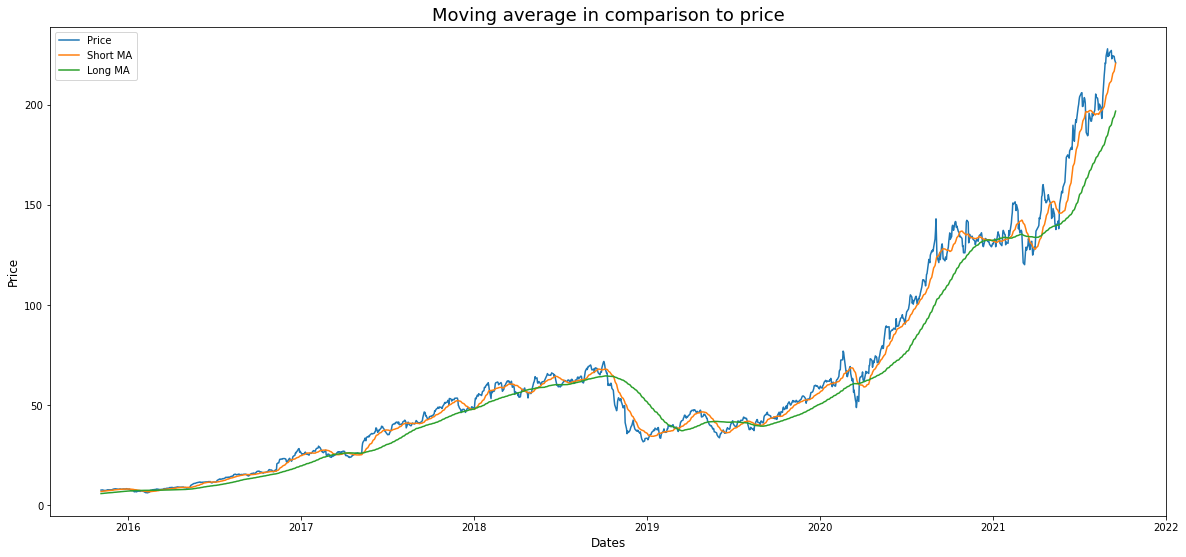

In [24]:
plt.figure(figsize=(20,9))

plt.xlabel('Dates',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('Moving average in comparison to price',fontsize=18)

plt.plot(modifiednvidia.Date, modifiednvidia.midprice, label='Price')
plt.plot(modifiednvidia.Date, modifiedshortMA.midprice, label='Short MA')
plt.plot(modifiednvidia.Date, modifiedlongMA.midprice, label='Long MA')

plt.legend()
plt.show()